In [6]:
import sys

sys.path.append("..")

from typing import List, Tuple
import pandas as pd
from ct.utils import normalize_hu, read_dcm
from covid_ct.gen_loc import process_lung_all
from utils.plot import plot_grid
from tqdm import tqdm

df = pd.read_pickle("../output/covid_ct_loc.pkl")
items: List[Tuple[Tuple[str, ...], Tuple[str, ...]]] = df[
    ["lung", "localizer"]
].values.tolist()

images = []

for idx, (lung_paths, loc_paths) in tqdm(list(enumerate(items[:10]))):
    lung_sitk, lung_3d = read_dcm(list(lung_paths))

    # Get lung, localizer, body, bones, soft
    lung_3d = normalize_hu(lung_3d)
    loc_2d = normalize_hu(read_dcm(list(loc_paths))[1][0])

    # Get lung, localizer, body, bones, drr
    images.append(list(process_lung_all(lung_3d, loc_2d)))


  0%|          | 0/10 [00:00<?, ?it/s]WARNING: In ../ITK-prefix/include/ITK-5.2/itkImageSeriesReader.hxx, line 479
ImageSeriesReader (0x56268df968f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.000971046

100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


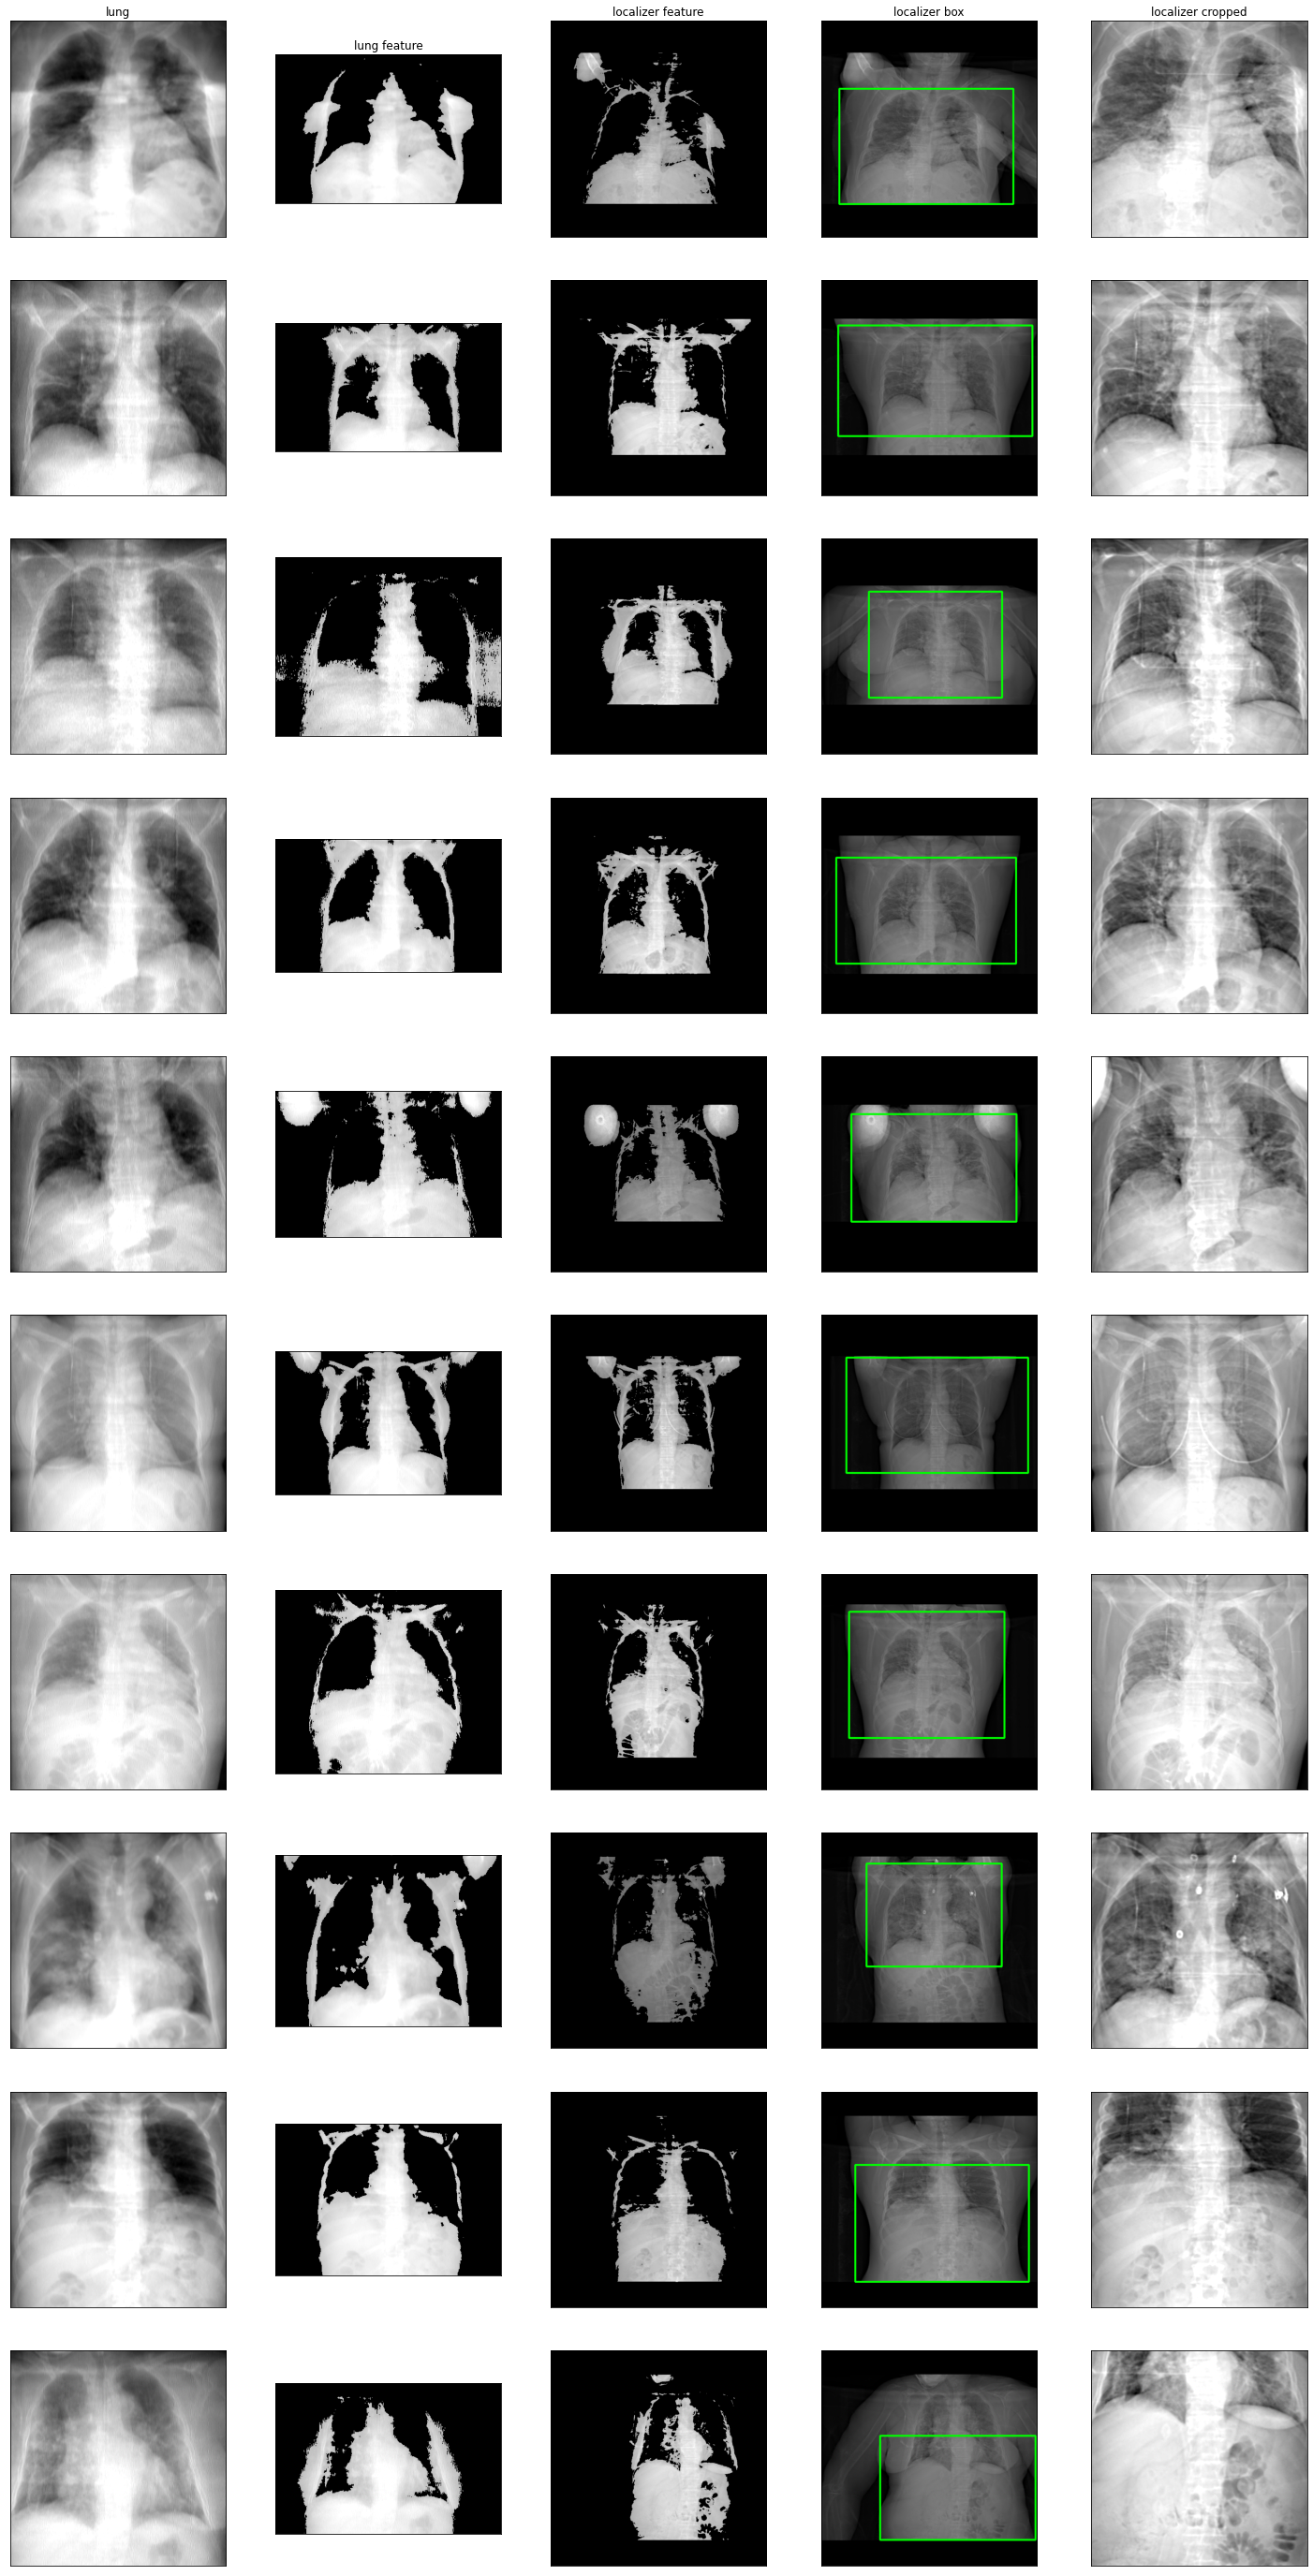

In [7]:
plot_grid(images, ["lung", "lung feature", "localizer feature", "localizer box", "localizer cropped"])